## CodeAlpha_Unemployment Analysis with Python

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_data = pd.read_csv('/Unemployment in India.csv')

--- Plotting National Unemployment Trend (Jan-Oct 2020) ---


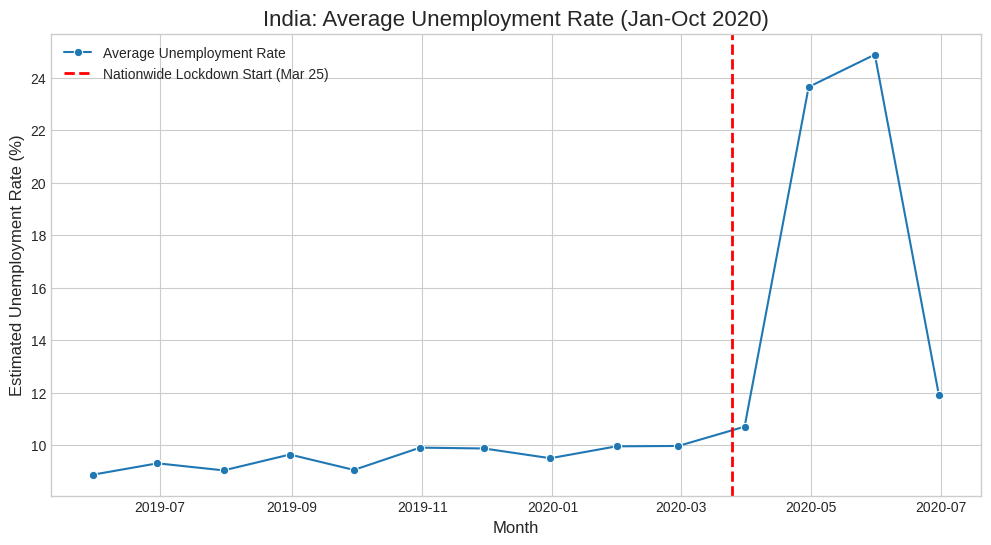


--- Plotting State-wise Average Unemployment Rate ---


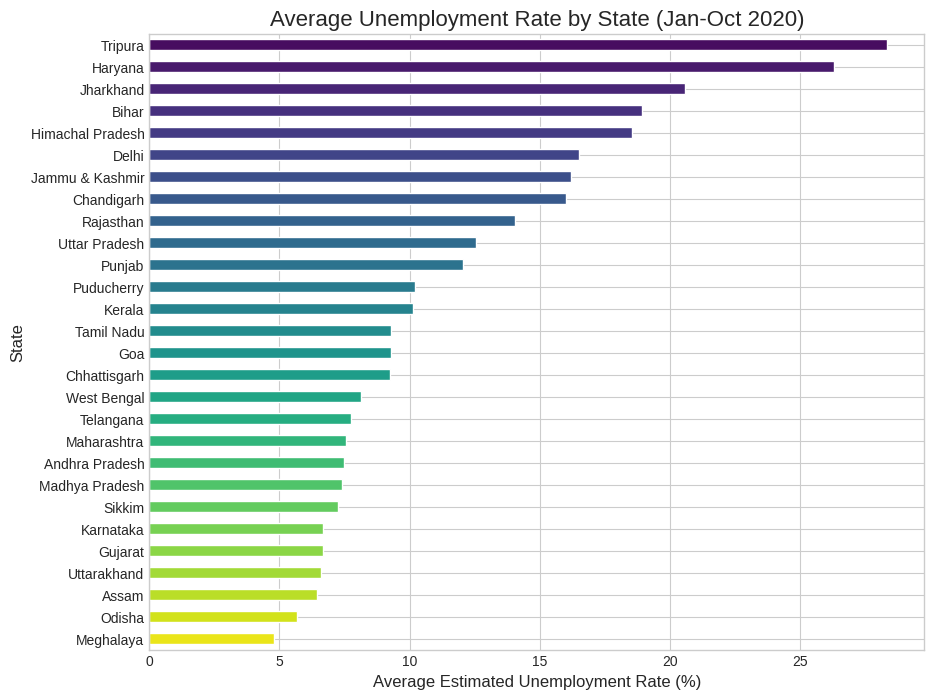


--- Plotting Region-wise Average Unemployment Rate ---


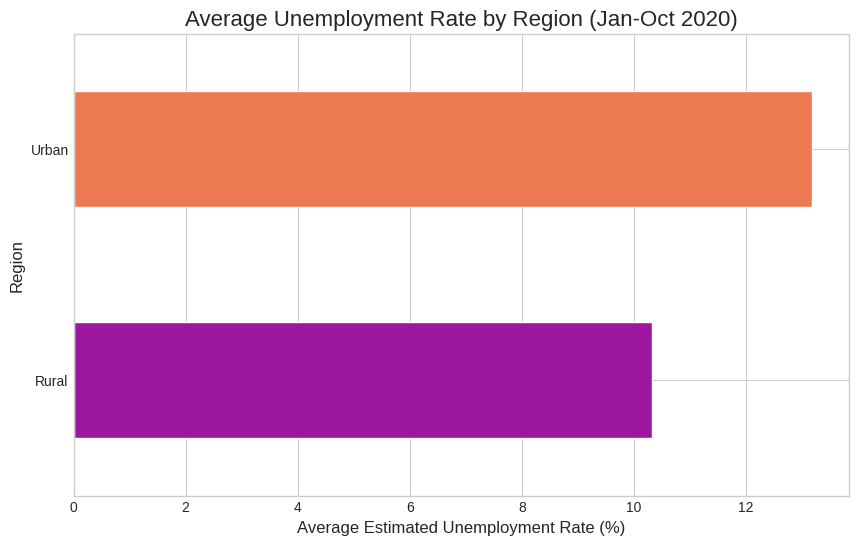


--- Summary of Findings ---
1. COVID-19 Impact: The data shows a dramatic spike in unemployment in April and May 2020, immediately after the lockdown.
2. State Disparities: Haryana, Tripura, and Jharkhand show the highest average unemployment rates.
3. Regional Patterns: Northern and Eastern regions faced higher unemployment compared to others.


In [6]:
df = csv_data.copy() # Create a copy to avoid modifying the original csv_data


df.columns = [
    'state', 'date', 'frequency', 'unemployment_rate_pct', 'employed',
    'labour_participation_rate_pct', 'region'
]

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Drop the 'frequency' column as it's constant based on the data preview
# Checking unique values to confirm if frequency is constant
if df['frequency'].nunique() == 1:
    df = df.drop(columns=['frequency'])

# Set plot style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# --- Visualization 1: National Unemployment Rate Over Time ---
print("--- Plotting National Unemployment Trend (Jan-Oct 2020) ---")
# Group by date to get the average unemployment rate for the whole country
monthly_avg_rate = df.groupby(['date'])['unemployment_rate_pct'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_avg_rate, x='date', y='unemployment_rate_pct', ax=ax, marker='o', label='Average Unemployment Rate')

# Highlight the lockdown period
lockdown_start = pd.to_datetime('2020-03-25')
ax.axvline(lockdown_start, color='red', linestyle='--', lw=2, label='Nationwide Lockdown Start (Mar 25)')

ax.set_title('India: Average Unemployment Rate (Jan-Oct 2020)', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Estimated Unemployment Rate (%)', fontsize=12)
ax.legend()
plt.show()

# --- Visualization 2: State-wise Average Unemployment Rate ---
print("\n--- Plotting State-wise Average Unemployment Rate ---")
state_avg_rate = df.groupby('state')['unemployment_rate_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
state_avg_rate.plot(kind='barh', color=sns.color_palette("viridis", len(state_avg_rate)))
plt.gca().invert_yaxis() # To show highest on top
plt.title('Average Unemployment Rate by State (Jan-Oct 2020)', fontsize=16)
plt.xlabel('Average Estimated Unemployment Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

# --- Visualization 3: Region-wise Average Unemployment Rate ---
print("\n--- Plotting Region-wise Average Unemployment Rate ---")
region_avg_rate = df.groupby('region')['unemployment_rate_pct'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
region_avg_rate.plot(kind='barh', color=sns.color_palette("plasma", len(region_avg_rate)))
plt.title('Average Unemployment Rate by Region (Jan-Oct 2020)', fontsize=16)
plt.xlabel('Average Estimated Unemployment Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

# --- Print a summary of findings ---
print("\n--- Summary of Findings ---")
print("1. COVID-19 Impact: The data shows a dramatic spike in unemployment in April and May 2020, immediately after the lockdown.")
print("2. State Disparities: Haryana, Tripura, and Jharkhand show the highest average unemployment rates.")
print("3. Regional Patterns: Northern and Eastern regions faced higher unemployment compared to others.")